In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd

df = pd.read_csv(
    "../experiments/lr_finder_20k_no_checkpoint/2019-09-02/lr_loss.csv", usecols=["lr", "loss"]
)

FileNotFoundError: [Errno 2] File b'../experiments/lr_finder_20k_no_checkpoint/2019-09-02/lr_loss.csv' does not exist: b'../experiments/lr_finder_20k_no_checkpoint/2019-09-02/lr_loss.csv'

In [3]:
df.tail()

,lr,loss
7692,0.701455,423.845367
7693,0.702263,512.798401
7694,0.703072,619.072266
7695,0.703882,731.271179
7696,0.704693,880.372803


In [4]:
lrs, losses = df.lr.values, df.loss.values

In [5]:
import matplotlib.pylab as plt
%matplotlib inline


def plot_loss(n_skip_beginning=10, n_skip_end=5):
    """
    Plots the loss.
    Parameters:
        n_skip_beginning - number of batches to skip on the left.
        n_skip_end - number of batches to skip on the right.
    """
    plt.ylabel("loss")
    plt.xlabel("learning rate (log scale)")
    plt.plot(lrs[n_skip_beginning:-n_skip_end], losses[n_skip_beginning:-n_skip_end])
    plt.xscale("log")


def plot_loss_change(sma=1, n_skip_beginning=10, n_skip_end=5):
    """
    Plots rate of change of the loss function.
    Parameters:
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip_beginning - number of batches to skip on the left.
        n_skip_end - number of batches to skip on the right.
        y_lim - limits for the y axis.
    """
    derivatives = get_derivatives(sma)[n_skip_beginning:-n_skip_end]
    plt.ylabel("rate of loss change")
    plt.xlabel("learning rate (log scale)")
    plt.plot(lrs[n_skip_beginning:-n_skip_end], derivatives)
    plt.xscale("log")


def get_derivatives(sma):
    assert sma >= 1
    derivatives = [0] * sma
    for i in range(sma, len(lrs)):
        derivatives.append((losses[i] - losses[i - sma]) / sma)
    return derivatives


def get_best_lr(sma, n_skip_beginning=10, n_skip_end=5):
    derivatives = get_derivatives(sma)
    best_der_idx = np.argmax(derivatives[n_skip_beginning:-n_skip_end])[0]
    return lrs[n_skip_beginning:-n_skip_end][best_der_idx]


def plot_exp_loss(beta=0.98, n_skip_beginning=10, n_skip_end=5):
    exp_loss = exp_weighted_losses(beta)[n_skip_beginning:-n_skip_end]
    plt.plot(lrs[n_skip_beginning:-n_skip_end], exp_loss, label="Loss")
    plt.ylabel("Exponentially Weighted Loss")
    plt.xlabel("Learning Rate (log scale)")
    plt.xscale("log")


def plot_exp_loss_change(beta=0.98, n_skip_beginning=10, n_skip_end=5):
    exp_der = exp_weighted_derivatives(beta)[n_skip_beginning:-n_skip_end]
    plt.plot(
        lrs[n_skip_beginning:-n_skip_end], exp_der, label=r"exp weighted loss change"
    )
    plt.ylabel(r"Exponentially Weighted Loss Change $\frac{dl}{dlr}$")
    plt.xlabel("Learning Rate (log scale)")
    plt.xscale("log")


def get_best_lr_exp_weighted(beta=0.98, n_skip_beginning=10, n_skip_end=5):
    derivatives = exp_weighted_derivatives(beta)
    return min(
        zip(
            derivatives[n_skip_beginning:-n_skip_end], lrs[n_skip_beginning:-n_skip_end]
        )
    )[1]


def exp_weighted_losses(beta=0.98):
    n_losses = []
    avg_loss = 0.0
    for batch_num, loss in enumerate(losses):
        avg_loss = beta * avg_loss + (1 - beta) * loss
        smoothed_loss = avg_loss / (1 - beta ** (batch_num + 1))
        n_losses.append(smoothed_loss)
    return n_losses


def exp_weighted_derivatives(beta=0.98):
    derivatives = [0]
    n_losses = exp_weighted_losses(beta)
    for i in range(1, len(losses)):
        derivatives.append((n_losses[i] - n_losses[i - 1]) / 1)
    return derivatives

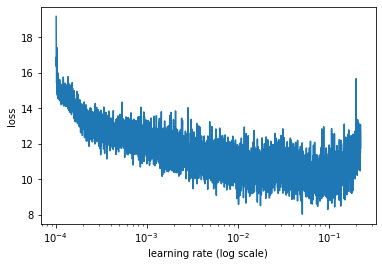

In [6]:
plot_loss(n_skip_end=1000)

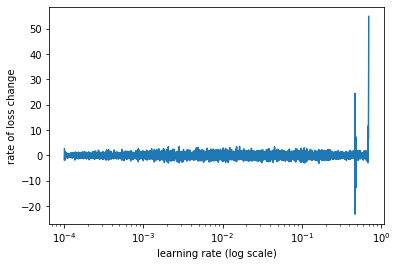

In [7]:
plot_loss_change()

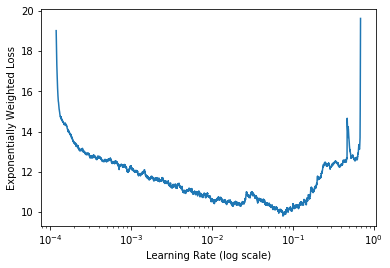

In [30]:
# fig = plt.figure()
plot_exp_loss(beta=0.97, n_skip_beginning=150, n_skip_end=20)
# plt.title("Experiment on 20000 Iterations")
# fig.savefig('lr.png', dpi=120)

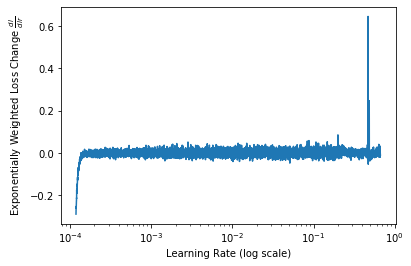

In [21]:
plot_exp_loss_change(n_skip_beginning=150, n_skip_end=50)